## Importing libraries
### Used UCL ML Repository

In [543]:
import pandas as pd
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9.0,"November 27, 2016",37


## Exploratory Data Analysis

In [544]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                             9069 
Pain                                                                   6145 
Anxiety                                                                5904 
Acne                                                                   5588 
Bipolar Disorde                                                        4224 
Insomnia                                                               3673 
Weight Loss                                                            3609 
Obesity                                                                3568 
ADHD                                                                   3383 
Diabetes, Type 2                                                       2554 
Emergency Contraception                                                2463 
High Blood Pressure                                                    2321 

In [545]:
df_train = df[(df['condition']=='Urinary Tract Infection') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')|(df['condition']=='Insomnia')]

In [546]:
df.shape

(161297, 7)

In [547]:
df_train.shape

(18933, 7)

In [548]:
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)


In [549]:
X.condition.value_counts()

Depression                 9069
Insomnia                   3673
Diabetes, Type 2           2554
High Blood Pressure        2321
Urinary Tract Infection    1316
Name: condition, dtype: int64

In [550]:
X.head()

,condition,review
11,Depression,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."""
16,Urinary Tract Infection,"""This drug worked very well for me and cleared up my UTI in a matter of 48hrs, although I was on a 7 day course of 2x200mg/daily. Unfortunately once the tablets finished the infection returned so needed a 2nd course. I&#039;m currently taking a low dose at evening to keep the infection at bay while the specialists do some tests. I normally get every side effect going and dread taking new medication in any form especially after an horrific experience with Ciorofloxacin but the only side effect I experienced with this was itchy ankles and feet on day two but that didn&#039;t last into third day so I would class this as a minor side effect and insignificant. Good luck."""
21,Insomnia,"""I have insomnia, it&#039;s horrible. My story begins with my PCP prescribing me Prozac to help with intestinal issues, because I was desperate I tried it, I was on it for 3 weeks. Stopped because of insomnia. Then I was prescribed Ativan, it out me out, but was very addicting. I had rebound insomnia. Then after about 14 days I hardly any sleep l tried the doctor one more time. I asked him about Trazadone. He told me that was a good medication for insomnia. He put me on 25 mgs, but stated I may have to figure out what dosage is best for me. I am currently taking 100 mgs, which is on the low range of what is prescribed, 400 mgs being at the high end for insomnia. I have the dry mouth and nasel congestion. I can live with that, I sleep now, yeah..."""
31,Depression,"""1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."""
44,Depression,"""my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"""


## Data preprocessing

In [551]:
X_uti=X[(X['condition']=='Urinary Tract Infection')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]
X_in=X[(X['condition']=='Insomnia')]

In [552]:
X['review'][31]

'"1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."'

In [553]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [554]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [555]:
pd.set_option('max_colwidth', -1)

<ipython-input-555-7020dba1819a>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [556]:
X.head()


,condition,review
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
16,Urinary Tract Infection,"This drug worked very well for me and cleared up my UTI in a matter of 48hrs, although I was on a 7 day course of 2x200mg/daily. Unfortunately once the tablets finished the infection returned so needed a 2nd course. I&#039;m currently taking a low dose at evening to keep the infection at bay while the specialists do some tests. I normally get every side effect going and dread taking new medication in any form especially after an horrific experience with Ciorofloxacin but the only side effect I experienced with this was itchy ankles and feet on day two but that didn&#039;t last into third day so I would class this as a minor side effect and insignificant. Good luck."
21,Insomnia,"I have insomnia, it&#039;s horrible. My story begins with my PCP prescribing me Prozac to help with intestinal issues, because I was desperate I tried it, I was on it for 3 weeks. Stopped because of insomnia. Then I was prescribed Ativan, it out me out, but was very addicting. I had rebound insomnia. Then after about 14 days I hardly any sleep l tried the doctor one more time. I asked him about Trazadone. He told me that was a good medication for insomnia. He put me on 25 mgs, but stated I may have to figure out what dosage is best for me. I am currently taking 100 mgs, which is on the low range of what is prescribed, 400 mgs being at the high end for insomnia. I have the dry mouth and nasel congestion. I can live with that, I sleep now, yeah..."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
44,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"


## NLP implementation

In [557]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### stopwords

In [558]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization

In [559]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [560]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [561]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prati\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [562]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [563]:
from bs4 import BeautifulSoup
import re

In [564]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [565]:
X['review_clean'] = X['review'].apply(review_to_words)

In [566]:
X.head()

,condition,review,review_clean
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
16,Urinary Tract Infection,"This drug worked very well for me and cleared up my UTI in a matter of 48hrs, although I was on a 7 day course of 2x200mg/daily. Unfortunately once the tablets finished the infection returned so needed a 2nd course. I&#039;m currently taking a low dose at evening to keep the infection at bay while the specialists do some tests. I normally get every side effect going and dread taking new medication in any form especially after an horrific experience with Ciorofloxacin but the only side effect I experienced with this was itchy ankles and feet on day two but that didn&#039;t last into third day so I would class this as a minor side effect and insignificant. Good luck.",drug worked well cleared uti matter hr although day course x mg daily unfortunately tablet finished infection returned needed nd course currently taking low dose evening keep infection bay specialist test normally get every side effect going dread taking new medication form especially horrific experience ciorofloxacin side effect experienced itchy ankle foot day two last third day would class minor side effect insignificant good luck
21,Insomnia,"I have insomnia, it&#039;s horrible. My story begins with my PCP prescribing me Prozac to help with intestinal issues, because I was desperate I tried it, I was on it for 3 weeks. Stopped because of insomnia. Then I was prescribed Ativan, it out me out, but was very addicting. I had rebound insomnia. Then after about 14 days I hardly any sleep l tried the doctor one more time. I asked him about Trazadone. He told me that was a good medication for insomnia. He put me on 25 mgs, but stated I may have to figure out what dosage is best for me. I am currently taking 100 mgs, which is on the low range of what is prescribed, 400 mgs being at the high end for insomnia. I have the dry mouth and nasel congestion. I can live with that, I sleep now, yeah...",insomnia horrible story begin pcp prescribing prozac help intestinal issue desperate tried week stopped insomnia prescribed ativan addicting rebound insomnia day hardly sleep l tried doctor one time asked trazadone told good medication insomnia put mg stated may figure dosage best currently taking mg low range prescribed mg high end insomnia dry mouth nasel congestion live sleep yeah
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
44,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this mo

## Creating features and target variables

In [567]:
X_feat=X['review_clean']
y=X['condition']

In [568]:
from sklearn.model_selection import train_test_split

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [570]:
import matplotlib.pyplot as plt

In [571]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Bag of words

In [572]:

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [573]:
count_train

<15146x12924 sparse matrix of type '<class 'numpy.int64'>'
	with 433157 stored elements in Compressed Sparse Row format>

In [574]:
import matplotlib.pyplot as plt

## ML Model: Naive Bayes


accuracy:   0.923
Confusion matrix, without normalization


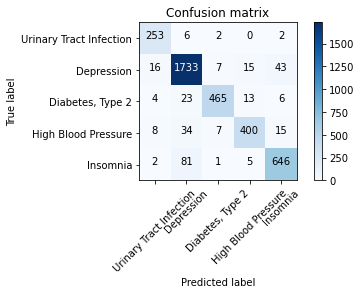

In [575]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])
plot_confusion_matrix(cm, classes=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])

## ML Model: Passive Aggressive Classifier

accuracy:   0.923
Confusion matrix, without normalization


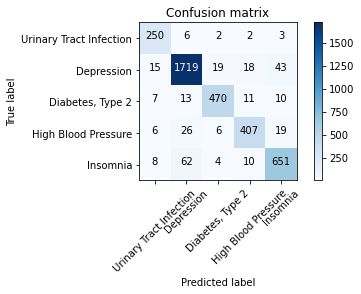

In [576]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])
plot_confusion_matrix(cm, classes=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])

In [577]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## TF-IDF

accuracy:   0.935
Confusion matrix, without normalization


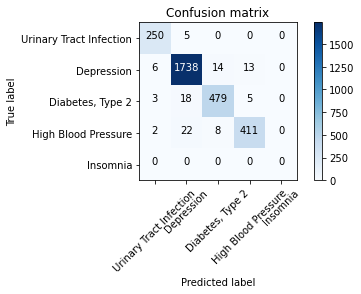

In [578]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomia'])
plot_confusion_matrix(cm, classes=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])

## TF-IDF:Bigrams

In [579]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.948
Confusion matrix, without normalization


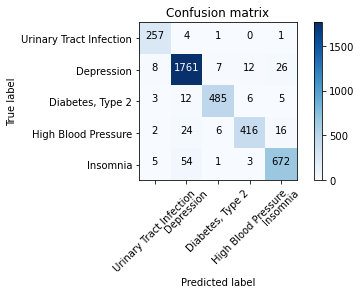

In [580]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])
plot_confusion_matrix(cm, classes=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])

## TF-IDF:Trigrams

accuracy:   0.948
Confusion matrix, without normalization


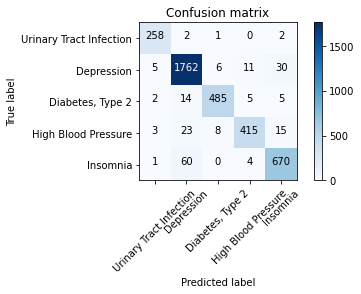

In [581]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])
plot_confusion_matrix(cm, classes=['Urinary Tract Infection', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])

## Most Informative features

In [582]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Urinary Tract Infection')

Urinary Tract Infection smaller 0.4071729982865359
Urinary Tract Infection diabetic 0.43878583417257555
Urinary Tract Infection truly 0.4394142502204773
Urinary Tract Infection trump 0.4394142502204773
Urinary Tract Infection cheery 0.4511315931882884
Urinary Tract Infection mph 0.49406756267499585
Urinary Tract Infection mri 0.49406756267499585
Urinary Tract Infection diaformin 0.6024764019232176
Urinary Tract Infection trunk 0.8251027302949503
Urinary Tract Infection tranzodone 2.112534663460181


In [583]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression myalgia 0.7978970066815841
Depression aorta 0.8474323984666721
Depression fun 0.8551443335010414
Depression plenty 0.9007972753653396
Depression step 0.942337999025124
Depression fouth 0.950100185019219
Depression stepmom 0.9824437369383523
Depression prediabetes 1.1685956803377942
Depression trintellix 1.2118756064453895
Depression add 3.4515133039987917


In [584]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure wall 0.672021608636536
High Blood Pressure mirtazapin 0.6912824884636308
High Blood Pressure tubal 0.6974305975649583
High Blood Pressure fmd 0.7240912431050959
High Blood Pressure counted 0.7728920684719706
High Blood Pressure trintellex 0.7766445852307925
High Blood Pressure counterbalance 0.7771518700958467
High Blood Pressure wala 0.8374846990602285
High Blood Pressure menopausal 0.933226381874467
High Blood Pressure dif 0.9662593534021973


In [585]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 distract 0.6034370693889414
Diabetes, Type 2 acclimating 0.6139135689811784
Diabetes, Type 2 dipstick 0.6147030857265889
Diabetes, Type 2 encouraging 0.6468840515448678
Diabetes, Type 2 trileptal 0.6663063967985425
Diabetes, Type 2 wort 0.7241020954061541
Diabetes, Type 2 worth 0.7461231544702354
Diabetes, Type 2 workplace 1.58629288894631
Diabetes, Type 2 oppressively 1.9809469484195292
Diabetes, Type 2 elimination 2.891944029008922


In [586]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Insomnia')

Insomnia welchol 0.6092733379496402
Insomnia victim 0.6169569451613972
Insomnia victimization 0.6169569451613972
Insomnia hoo 0.6272538389137129
Insomnia wakening 0.6292572386266341
Insomnia nodeprine 0.708057233489009
Insomnia historically 0.7334306084923216
Insomnia checked 1.087698593351397
Insomnia spirometric 1.104099577854917
Insomnia hollow 1.3114685603666763


In [587]:
X.tail()

,condition,review,review_clean
161266,Insomnia,"Zolpidem does work fast. However, I have a right arm that goes to sleep on me easily. So if I take zolpidem, I make sure that I fall asleep in a position that will not cut the circulation in my arm.",zolpidem work fast however right arm go sleep easily take zolpidem make sure fall asleep position cut circulation arm
161277,Insomnia,"I started taking this medication 10 years ago. My doctor told me it was non-narcotic and non-habit forming. Up to that time I had never had any addictions to drugs or alcohol, but unfortunately I am dependent on this drug for sleep. It does however work very well with few side effects and I wake up feeling refreshed.",started taking medication year ago doctor told non narcotic non habit forming time never addiction drug alcohol unfortunately dependent drug sleep however work well side effect wake feeling refreshed
161278,"Diabetes, Type 2",I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me,got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine
161286,Depression,"This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap
161290,High Blood Pressure,"I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation


In [588]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

ValueError: X has 12924 features per sample; expecting 535169

In [ ]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

In [ ]:
text =["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

In [ ]:
text =["I am deprived of sleep"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

In [ ]:
text =["My sugar level went down"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

 ## Testing on the test dataset 

In [ ]:
df_test=pd.read_csv("drugsComTest_raw.tsv", sep='\t')

In [ ]:
df_test.shape


In [ ]:
Y = df_test[(df_test['condition']=='Urinary Tract Infection') | (df_test['condition']=='Depression') | (df_test['condition']=='High Blood Pressure')|(df_test['condition']=='Diabetes, Type 2')|(df_test['condition']=='Insomnia')]

In [ ]:
Y = df_test.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [ ]:
Y.condition.value_counts()

In [ ]:
Y_uti=Y[(Y['condition']=='Urinary Tract Infection')]
Y_dep=Y[(Y['condition']=='Depression')]
Y_bp=Y[(Y['condition']=='High Blood Pressure')]
Y_diab=Y[(Y['condition']=='Diabetes, Type 2')]
Y_ins=Y[(Y['condition']=='Insomnia')]


In [ ]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [ ]:
pd.set_option('max_colwidth', -1)

In [ ]:
Y.tail(10)

In [ ]:
text =["I had UTI, usually it goes away with OTC Azo and water, but this time I could not get rid of it. So I went to the ER. They gave me Bactrim. 2 a day for 5 days. I took the entire round of them and nothing changed. The medicine itself made me sick as a dog. I could eat with it or not eat with it and it didn&#039;t matter. I was still so nauseous. It gave me chills and made me dizzy as well. I wouldn&#039;t give this to my worst enemy!"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

In [ ]:
text =["I&#039;ve been using victoza for 3 months now. 1.6 for few weeks then 1.8. I had one night of sickness at beginning and another recently but in general it&#039;s more like the thought of eating food that makes me feel sick. My bowel and stomach feels a lot like I need to have an evacuation but I&#039;ve not had diarrhea. As for weight loss I&#039;ve gone from over 17 stone to 14st 7lbs in 3 months without doing anything. My Hbc1a has dropped from over 25 to around 7.. So everything is pretty amazing. I&#039;m lucky that it&#039;s free for me in UK but it did take a few years to get it prescribed by my diabetic specialist nurse. I don&#039;t know if there are any long term side effects but at present I believe it has changed and saved my life"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1